In [ ]:
import pandas as pd

train=pd.read_csv('../Datasets/new/train.csv')
test=pd.read_csv('../Datasets/new/test.csv')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/_m/9lngnh4j7mxbx3jyy8_lpcnh0000gn/T/ipykernel_74509/2842202294.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, palette='Set2')


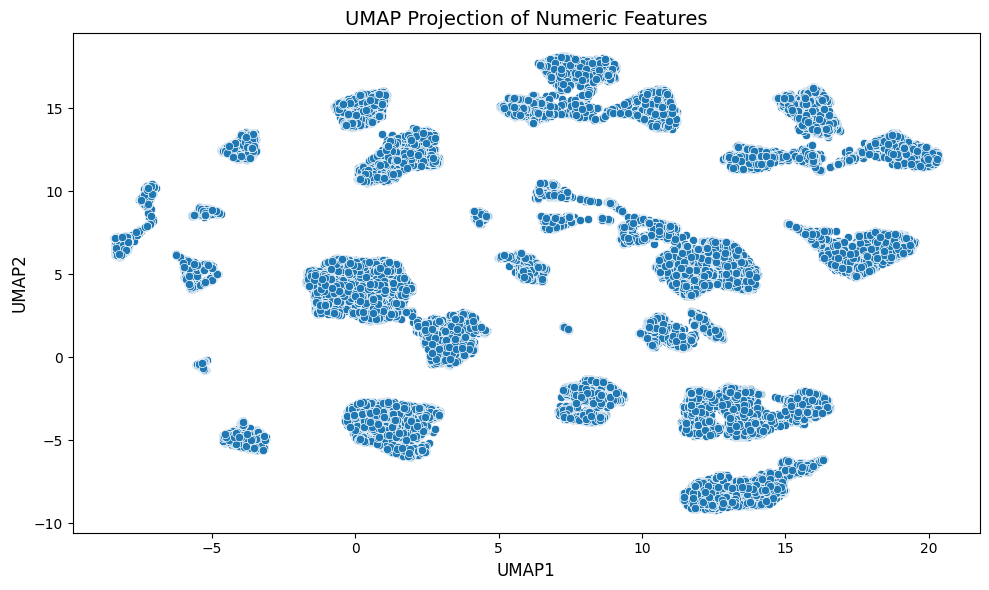

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = "EDA_plots"
os.makedirs(output_dir, exist_ok=True)

# Check if there are any missing values and handle them (UMAP doesn't handle NaNs)
train_numeric = train.select_dtypes(include=[np.number]).dropna()

# Standardize the data for UMAP (UMAP works best on scaled data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_numeric_scaled = scaler.fit_transform(train_numeric)

# Apply UMAP dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(train_numeric_scaled)

# Create a DataFrame with UMAP results for plotting
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])

# Plot UMAP result and save the figure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, palette='Set2')
plt.title('UMAP Projection of Numeric Features', fontsize=14)
plt.xlabel('UMAP1', fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'umap_projection.png'))
plt.show()
plt.close()

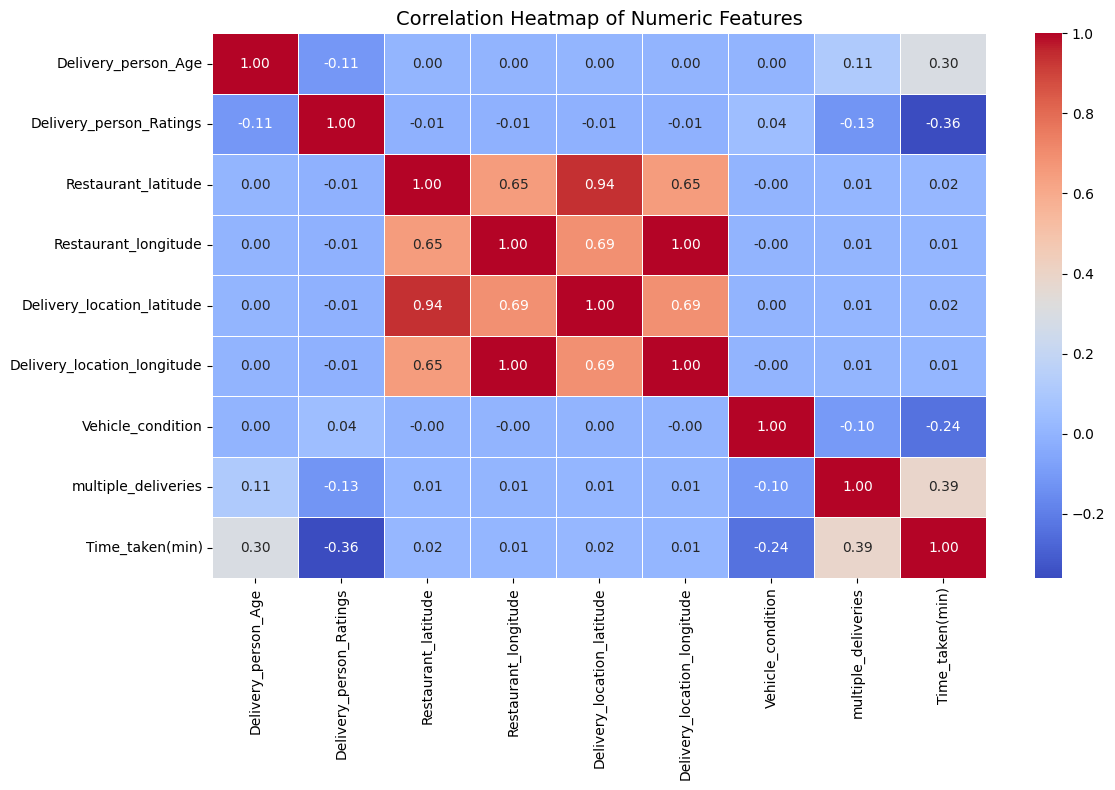

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = "EDA_plots"
os.makedirs(output_dir, exist_ok=True)

train_numeric = train.select_dtypes(include=[np.number]).dropna()

# Compute the correlation matrix
corr_matrix = train_numeric.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png'))
plt.show()
plt.close()